<div style="display:flex; align-items:center;">
  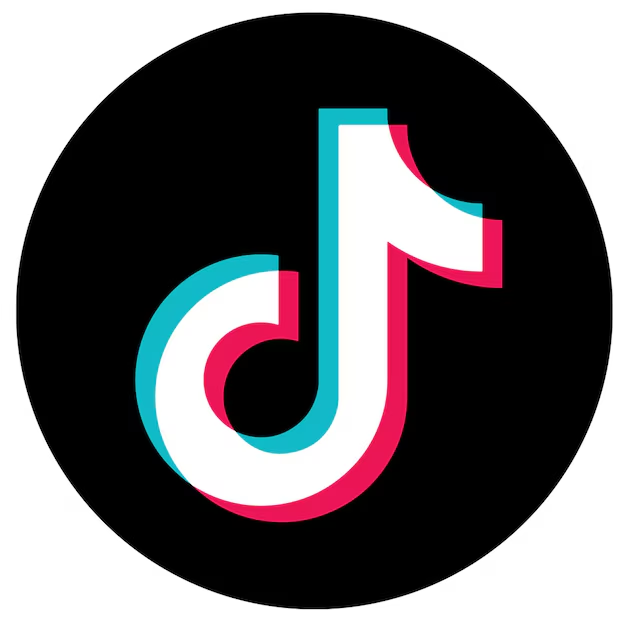
  <h1 style="margin:0 0 0 10px; line-height:50px;">TikTok Video Classification Project</h1>
</div>

TikTok users have the ability to submit reports that identify videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. The process generates a large number of user reports that are challenging to consider in a timely manner. 

TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

In [1]:
# Import packages for data manipulation and visualization
import piplite
print("piplite package loaded")

await piplite.install('seaborn')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

piplite package loaded


Matplotlib is building the font cache; this may take a moment.


In [6]:
# Load dataset into dataframe
data = pd.read_csv("/drive/data/tiktok_dataset.csv")

In [7]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [8]:
# Get basic information about the data and determine how many null values are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.5+ MB


In [9]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


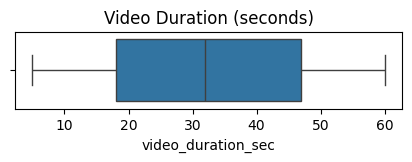

In [10]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5, 1))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Video Duration (seconds)')
plt.show()

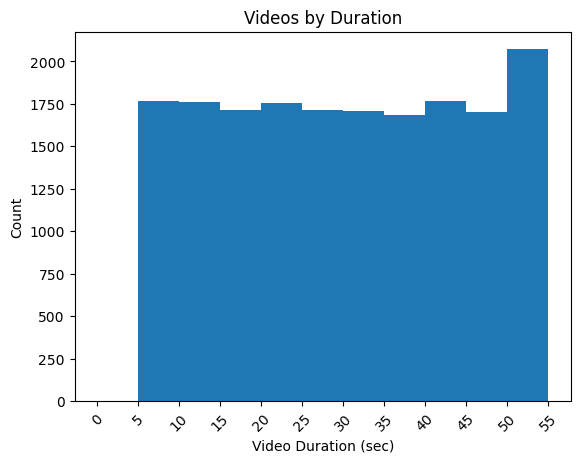

In [11]:
# Create a histogram
plt.hist(data['video_duration_sec'], bins=range(0, 60, 5))

plt.xticks(range(0, 60, 5), rotation=45)
plt.xlabel('Video Duration (sec)')

plt.ylabel('Count')

plt.title('Videos by Duration')
plt.show()

**The videos lenghts are fairly evenly distributed and range between 5 and 55 seconds. There are no obvious outliers.**

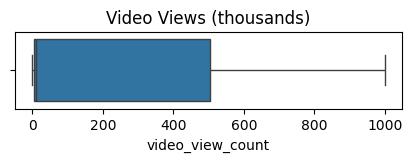

In [12]:
# Create a boxplot to visualize distribution of `video_view_count`
views_k = data['video_view_count'] / 1000

plt.figure(figsize=(5, 1))
sns.boxplot(x=views_k)
plt.title('Video Views (thousands)')
plt.show()

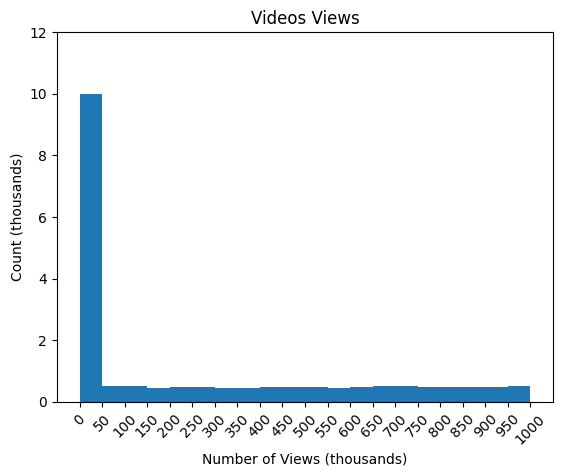

In [13]:
# Create a histogram
plt.hist(views_k, bins=range(0, 1001, 50))

plt.xticks(range(0, 1001, 50), rotation=45)
plt.xlabel('Number of Views (thousands)')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=(yticks/1000).astype(int))
plt.ylabel('Count (thousands)')

plt.title('Videos Views')
plt.show()

**There are less than 50 views nearing one million views. This may be bad data, but more likely represents a handful of viral videos.**

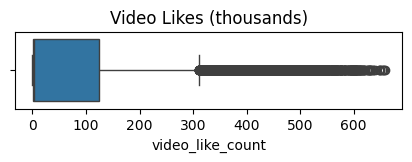

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
likes_k = data['video_like_count'] / 1000

plt.figure(figsize=(5, 1))
sns.boxplot(x=likes_k)
plt.title('Video Likes (thousands)')
plt.show()

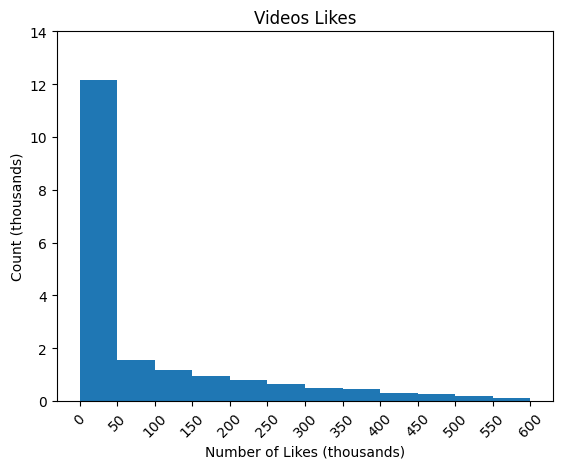

In [15]:
# Create a histogram
plt.hist(likes_k, bins=range(0, 650, 50))

plt.xticks(range(0, 650, 50), rotation=45)
plt.xlabel('Number of Likes (thousands)')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=(yticks/1000).astype(int))
plt.ylabel('Count (thousands)')

plt.title('Videos Likes')
plt.show()

**The number of video "likes" is inversely proportional to the number of views. Videos with the most views consistenly receive the most likes.**

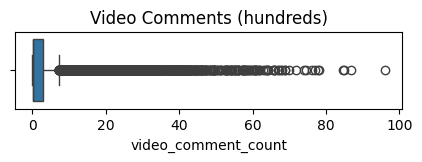

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
comments_h = data['video_comment_count'] / 100

plt.figure(figsize=(5, 1))
sns.boxplot(x=comments_h)
plt.title('Video Comments (hundreds)')
plt.show()

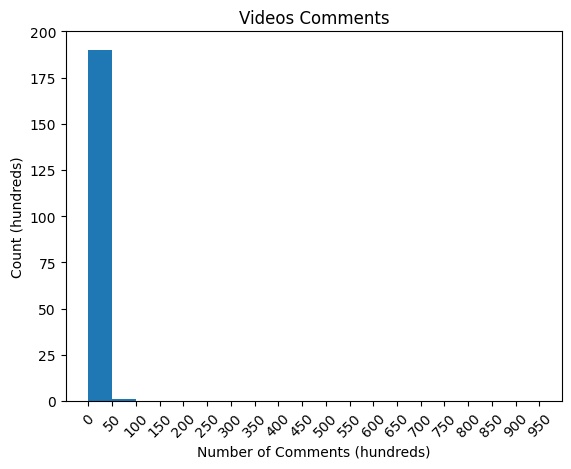

In [17]:
# Create a histogram
plt.hist(comments_h, bins=range(0, 1000, 50))

plt.xticks(range(0, 1000, 50), rotation=45)
plt.xlabel('Number of Comments (hundreds)')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=(yticks/100).astype(int))
plt.ylabel('Count (hundreds)')

plt.title('Videos Comments')
plt.show()

**The number of comments is also proportional to the number of views. However, comments are mostly limited to the videos with a high number of views.**

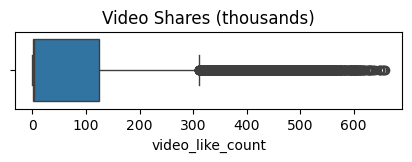

In [18]:
# Create a boxplot to visualize distribution of `video_share_count`
shares_k = data['video_share_count'] / 1000

plt.figure(figsize=(5, 1))
sns.boxplot(x=likes_k)
plt.title('Video Shares (thousands)')
plt.show()

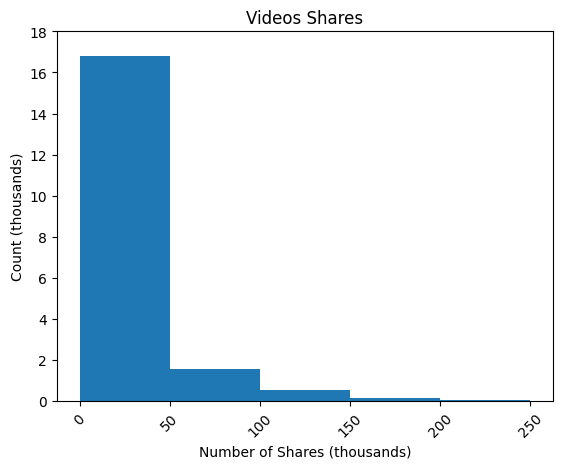

In [19]:
# Create a histogram
plt.hist(shares_k, bins=range(0, 300, 50))

plt.xticks(range(0, 300, 50), rotation=45)
plt.xlabel('Number of Shares (thousands)')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=(yticks/1000).astype(int))
plt.ylabel('Count (thousands)')

plt.title('Videos Shares')
plt.show()

**The number of video shares is skewed to the right.**

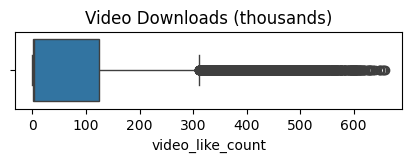

In [20]:
# Create a boxplot to visualize distribution of `video_download_count`
downloads_k = data['video_download_count'] / 1000

plt.figure(figsize=(5, 1))
sns.boxplot(x=likes_k)
plt.title('Video Downloads (thousands)')
plt.show()

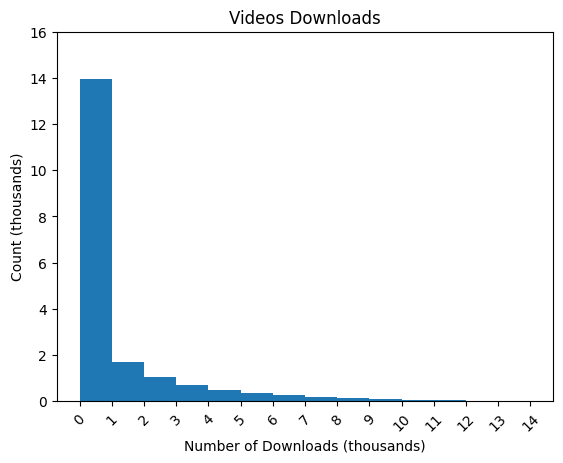

In [21]:
# Create a histogram
plt.hist(downloads_k, bins=range(0, 15, 1))

plt.xticks(range(0, 15, 1), rotation=45)
plt.xlabel('Number of Downloads (thousands)')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=(yticks/1000).astype(int))
plt.ylabel('Count (thousands)')

plt.title('Videos Downloads')
plt.show()

**The number of video downloads is also skewed to the right.**

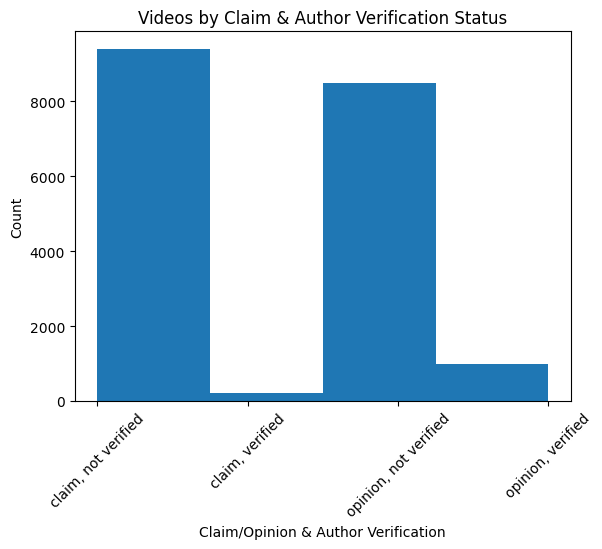

In [22]:
# Create a histogram
claim_verified_labels = data[['claim_status', 'verified_status']].dropna().agg(', '.join, axis=1) #drop NaN values

# claim_verified_labels.head(10)

plt.hist(claim_verified_labels, bins=4)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Claim/Opinion & Author Verification')
plt.title('Videos by Claim & Author Verification Status')
plt.show()

**Most of the posted videos are by unverified users. While the number of videos that represent "Claims" versus "Opinions" is relatively balanced, there are slightly more "Claims", which tend to be posted by unverified users".**

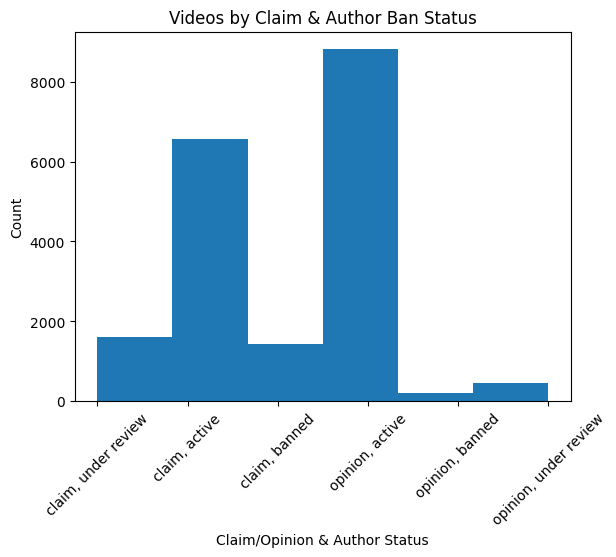

In [23]:
# Create a histogram
claim_banned_labels = data[['claim_status', 'author_ban_status']].dropna().agg(', '.join, axis=1)  #drop NaN values

#data['author_ban_status'].unique()
#claim_banned_labels.head(10)

plt.hist(claim_banned_labels, bins=6)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Claim/Opinion & Author Status')
plt.title('Videos by Claim & Author Ban Status')
plt.show()

**There are far fewer videos posted by authors that have been banned or are under review.**

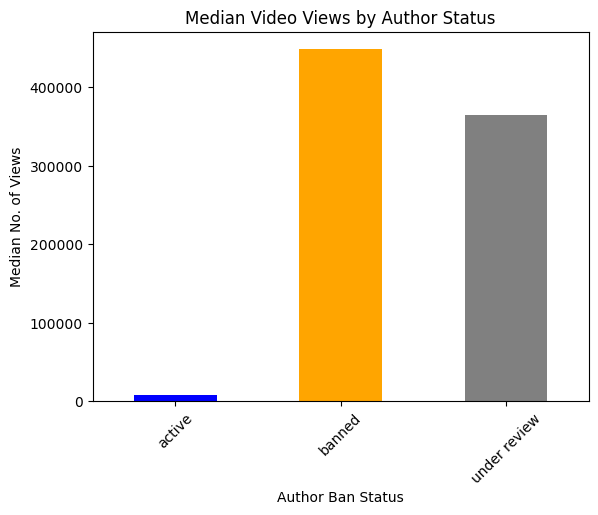

In [24]:
# Create a bar plot
author_views_by_status = data.groupby('author_ban_status')['video_view_count'].median()

# author_views_by_status

author_views_by_status.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.ylabel('Median No. of Views')
plt.xlabel('Author Ban Status')
plt.title('Median Video Views by Author Status')
plt.xticks(rotation=45)
plt.show()

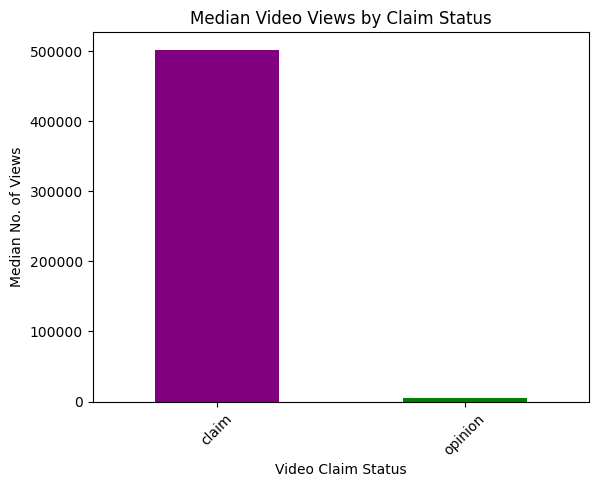

In [27]:
# Calculate the median view count for claim status.
views_by_claim_status = data.groupby('claim_status')['video_view_count'].median()

# views_by_claim_status

views_by_claim_status.plot(kind='bar', color=['purple', 'green'])
plt.ylabel('Median No. of Views')
plt.xlabel('Video Claim Status')
plt.title('Median Video Views by Claim Status')
plt.xticks(rotation=45)
plt.show()

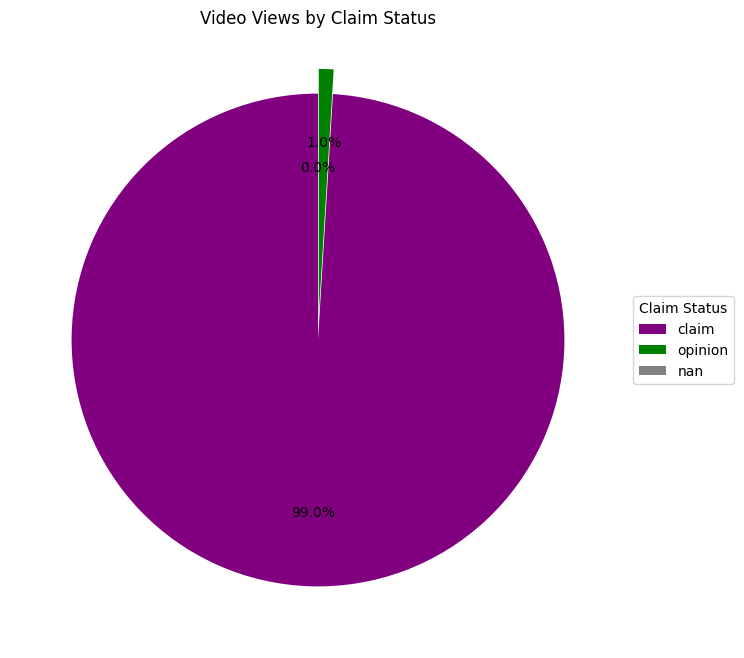

In [29]:
# Create a pie graph
claim_status_labels = data['claim_status'].unique()
video_views = data.groupby('claim_status', dropna=False)['video_view_count'].sum()
colors=['purple', 'green', 'gray']

explode = [0.1 if status == 'opinion' else 0 for status in claim_status_labels]

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    video_views,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',         # show percentages on slices
    explode=explode,
    pctdistance=0.7,           # distance of percentages from center
    startangle=90
)

# Add legend
plt.legend(patches, video_views.index, title="Claim Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Video Views by Claim Status')
plt.show()

**Videos that present claims represent the vast majority of video views. Additionally, videos by banned authors have received a higher number of median views. We've seen from a previous chart that the number of vidoes labels as "Claims" (versus "Opinions") is also slightly higher for authors who are banned or under review. That suggests a correlation between claim status and views - indicating that "Claims" tend to generate higher social media engagement.**

### **Identify outliers**

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

In this TikTok dataset, the values for the count variables are not normally distributed - they are heavily skewed to the right. For that reason, we'll used a modified calculation for the outlier threshold calculated as the median value + 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if we used the 3rd quartile.

In [30]:
def outlier_counts(values):
    # Only calculate for numeric columns
    if not pd.api.types.is_numeric_dtype(values):
        return [None, None, None]
    
    iqr = values.quantile(0.75) - values.quantile(0.25)
    median = values.median()
    threshold = median + 1.5 * iqr
    num_outliers = (values > threshold).sum()
    
    return num_outliers

# Apply the function to each column
outliers = data.apply(outlier_counts)

outliers

print(f"Number of outliers, video_view_count: {outliers['video_view_count']}\n"
      f"Number of outliers, video_like_count: {outliers['video_like_count']}\n"
      f"Number of outliers, video_share_count: {outliers['video_share_count']}\n"
      f"Number of outliers, video_download_count: {outliers['video_download_count']}\n"
      f"Number of outliers, video_comment_count: {outliers['video_comment_count']}\n"
     )

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882



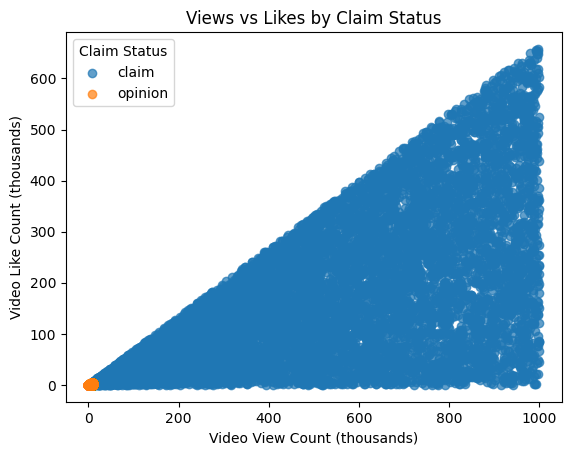

In [31]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
for status, group in data.groupby('claim_status'):
    plt.scatter(
        group['video_view_count'] / 1000,
        group['video_like_count'] / 1000,
        alpha=0.7,
        label=status
    )

plt.xlabel('Video View Count (thousands)')
plt.ylabel('Video Like Count (thousands)')
plt.title('Views vs Likes by Claim Status')
plt.legend(title='Claim Status')
plt.show()

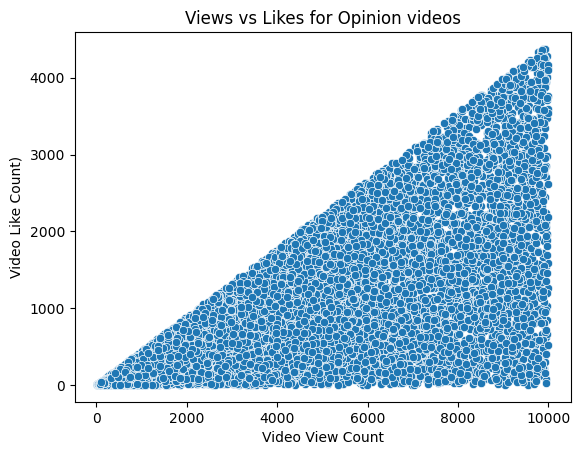

In [32]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
opinions = data[data['claim_status'] == 'opinion']

sns.scatterplot(
    data=opinions,
    x='video_view_count',
    y='video_like_count',
  #  hue='claim_status'
)

plt.title('Views vs Likes for Opinion videos')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count)')
plt.show()
